In [1]:
import numpy as np
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
from collections import Counter
import pandas as pd

In [2]:
class RandomClassifier(BaseEstimator):
    def __init__(self, p=0.5, method='uniform_random'):
        self.p = 0.5 if p < 0.0 or p > 1.0 else p
        self.method = method if method in ["uniform_random", "bernoulli", "gaussian"] else "uniform_random"
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        if self.method == "gaussian":
            return (0.5 + np.random.randn(len(X))) < self.p
        elif self.method == "bernoulli":
            return np.bool_(bernoulli.rvs(self.p, size=len(X)))
        else:
            return np.random.rand(len(X)) < self.p

In [3]:
# let's create a dataset of size 100 instances.
X = np.random.rand(1000)

In [4]:
def compute_prior(y):
    # initialize the counter object on the 'y' labels
    c = Counter(y)
    # convert the labels into class proportions
    props = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in props:
        props[True] = 0.0
    if False not in props:
        props[False] = 0.0
    return props


In [5]:
p_vals = np.arange(0., 1., 0.1)
b_vals = []
g_vals = []
u_vals = []
for p in p_vals:
    # spawn the sporadic classifier with bernouli random sample generator
    cla = RandomClassifier(p=p, method='bernoulli')
    # predict the labels for the input
    y = cla.predict(X)
    # compute priors
    props = compute_prior(y)
    # pick the probabilty of True class
    b_vals.append(props[True])
    
    # spawn the sporadic classifier with gaussian random sample generator
    y = RandomClassifier(p=p, method='gaussian').predict(X)
    g_vals.append(compute_prior(y)[True])
    
    # spawn the sporadic classifier with uniform random sample generator
    y = RandomClassifier(p=p, method='uniform_random').predict(X)
    u_vals.append(compute_prior(y)[True])

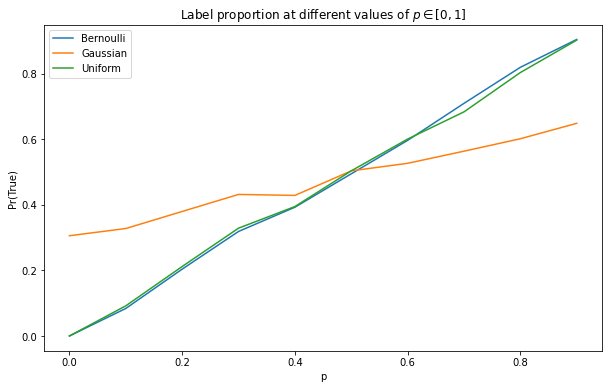

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(p_vals, b_vals)
plt.plot(p_vals, g_vals)
plt.plot(p_vals, u_vals)
plt.xlabel('p')
plt.ylabel('Pr(True)')
plt.title('Label proportion at different values of $p\in[0,1]$')
plt.legend(['Bernoulli','Gaussian','Uniform'], loc='upper left')
plt.show()

# Task 2

In [7]:
from sklearn.datasets import load_iris

data = load_iris()

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df = pd.DataFrame(data.data)
df.columns=['x1','x2','x3','x4']
df['target'] = data.target

In [10]:
df.head()

,x1,x2,x3,x4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now, we need to convert it as a binary classification problem, by keeping majority class as one class and the rest as another class.

In [11]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

Lets call 0 as one class and (1 and 2) as other class.

In [12]:
df['target'] = df.target.replace({2:1})

In [13]:
df.target.value_counts()

1    100
0     50
Name: target, dtype: int64

In [14]:
X = df[['x1','x2','x3','x4']]
y = df.target

In [15]:
model = RandomClassifier(p=0.75,method='bernoulli')
prior_label = model.predict(X)

In [16]:
prior_label

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [17]:
compute_prior(prior_label)

{True: 0.7266666666666667, False: 0.2733333333333333}

Plotting precision, recall and F1 score

In [18]:
precision = []
recall = []
f1score = []

In [19]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [20]:
p_values = np.arange(0,1,0.1)

for p_value in p_values:
    model = RandomClassifier(p=p_value, method='bernoulli')
    y_pred = model.predict(X)
    precision.append(precision_score(y,y_pred))
    recall.append(recall_score(y,y_pred))
    f1score.append(f1_score(y,y_pred))

/home/gokul/miniconda3/envs/dsai/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


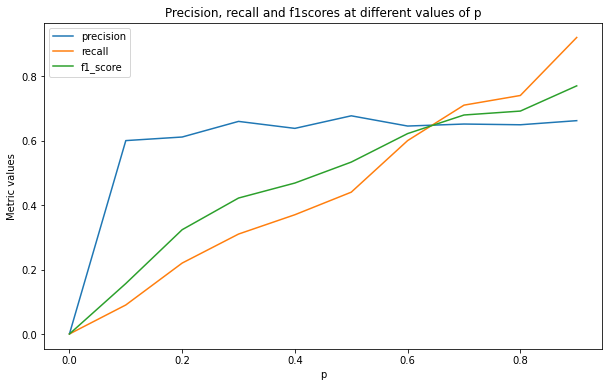

In [21]:
plt.figure(figsize=(10,6))
plt.plot(p_values, precision)
plt.plot(p_values, recall)
plt.plot(p_values, f1score)
plt.xlabel('p')
plt.ylabel('Metric values')
plt.title('Precision, recall and f1scores at different values of p')
plt.legend(['precision','recall','f1_score'], loc='upper left')
plt.show()

Below 0.7, precision is high but recall is low. Above 0.7, recall is high but precision is low. Maximum f1score is attained when the p value is near 1. This is because of the class imbalance. Lets try to balance the dataset and then repeat the experiment.


In [22]:
df = pd.DataFrame(data.data)
df.columns=['x1','x2','x3','x4']
df['target'] = data.target

df = df[df['target'] != 2]

/home/gokul/miniconda3/envs/dsai/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


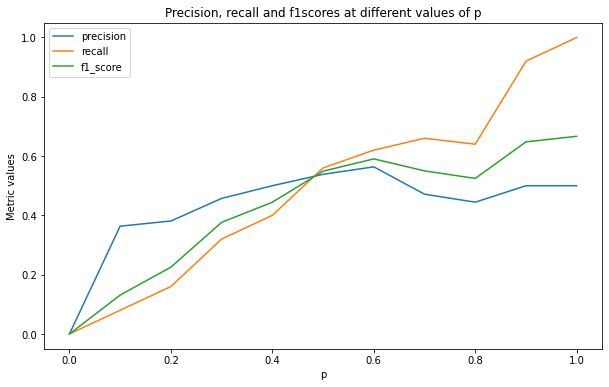

In [23]:
precision = []
recall = []
f1score = []

p_values = np.arange(0,1.1,0.1)

X = df[['x1','x2','x3','x4']]
y = df.target

for p_value in p_values:
    model = RandomClassifier(p=p_value, method='bernoulli')
    y_pred = model.predict(X)
    precision.append(precision_score(y,y_pred))
    recall.append(recall_score(y,y_pred))
    f1score.append(f1_score(y,y_pred))

plt.figure(figsize=(10,6))
plt.plot(p_values, precision)
plt.plot(p_values, recall)
plt.plot(p_values, f1score)
plt.xlabel('p')
plt.ylabel('Metric values')
plt.title('Precision, recall and f1scores at different values of p')
plt.legend(['precision','recall','f1_score'], loc='upper left')
plt.show()

value of p being 0.5 is the sweer spot for the precison recall tradeoff. However, f1 score is high around 0.8 to 0.9

In [24]:
model = RandomClassifier(p=0.85, method='bernoulli')
y_pred = model.predict(X)

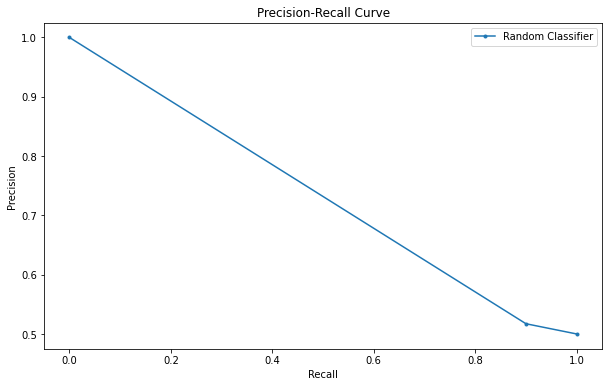

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y, y_pred)
plt.figure(figsize=(10,6))
plt.plot(recall, precision, marker='.', label='Random Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

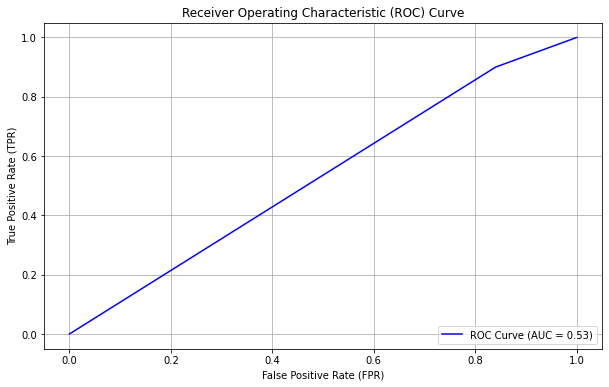

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y, y_pred)

# Step 3: Plot the ROC Curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import auc

auprc = auc(recall, precision)
print(f"AUPRC: {auprc:.2f}")
print(f"AUROC: {roc_auc:.2f}")

AUPRC: 0.73
AUROC: 0.53


# Task 3 - Visualising decision boundary

In [28]:
grid=[]
for i in range(100):
    for j in range(100):
        grid.append((i,j))

In [29]:
grid_df = pd.DataFrame(grid)
grid_df.columns = ['x1','x2']
grid_df.head()

,x1,x2
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [30]:
def generate_graph(p_value,grid_df,method_name):
    model = RandomClassifier(p=p_value,method=method_name)
    grid_df['target'] = model.predict(grid_df[['x1','x2']])
    true_pred = grid_df[grid_df['target'] == True]
    false_pred = grid_df[grid_df['target'] == False]
    plt.figure(figsize=(10,6))
    plt.scatter(true_pred['x1'], true_pred['x2'], color = 'green', label = 'Class 1')
    plt.scatter(false_pred['x1'], false_pred['x2'], color = 'red', label = 'Class 0')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision boundary for {method_name} at p = {p}')
    plt.legend()
    plt.grid(True)
    plt.show()

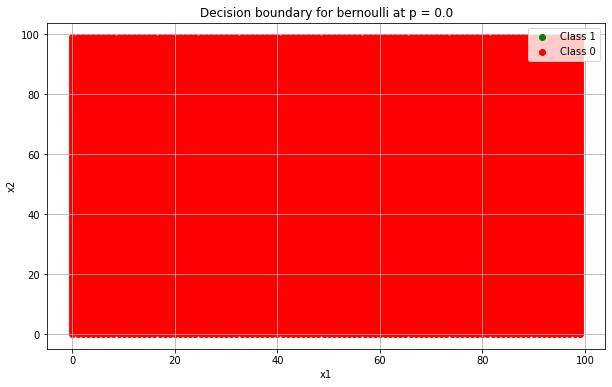

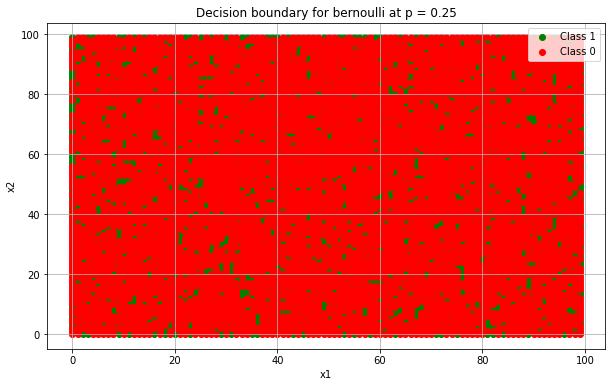

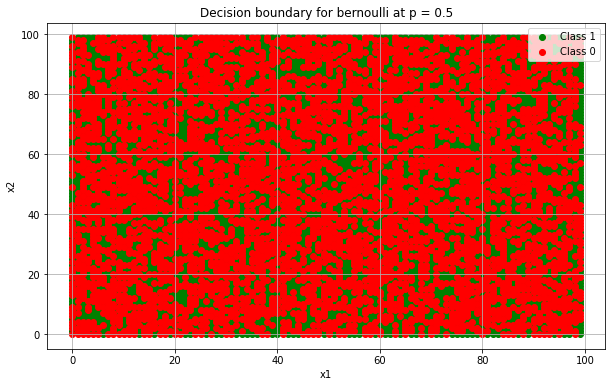

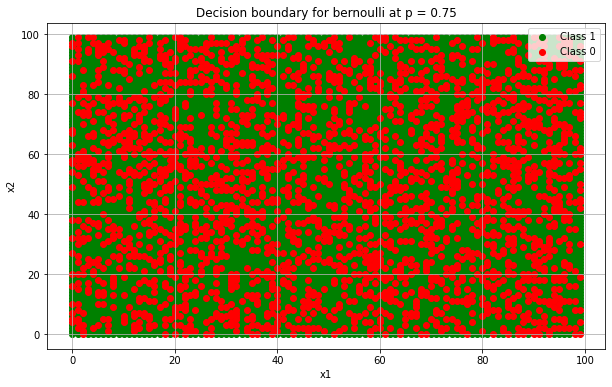

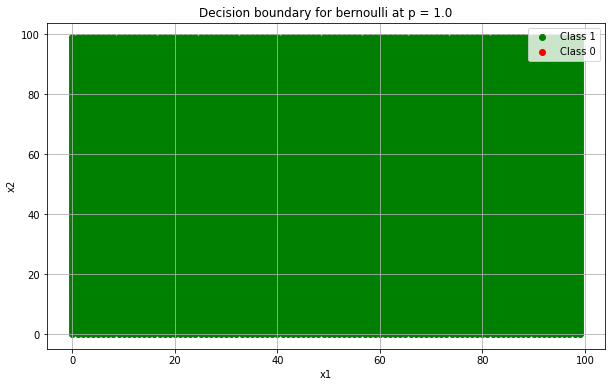

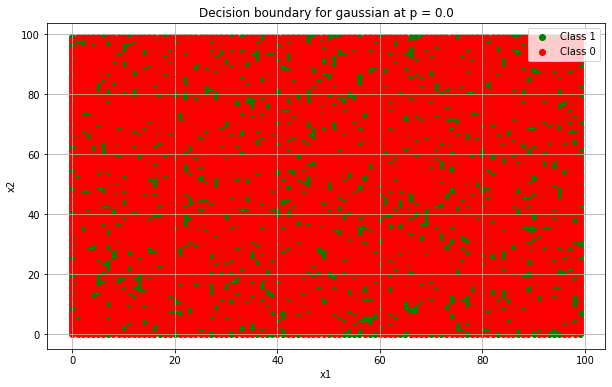

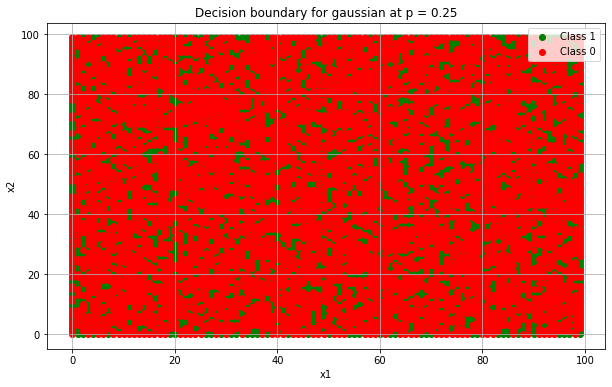

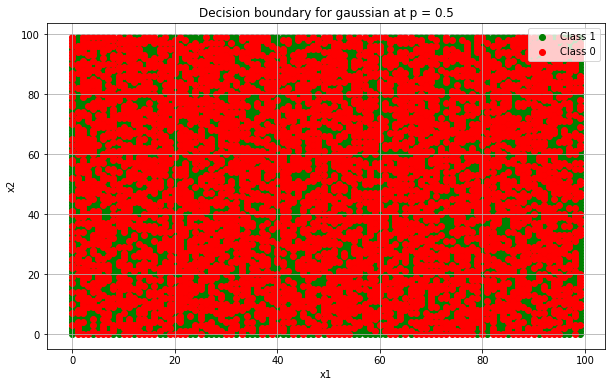

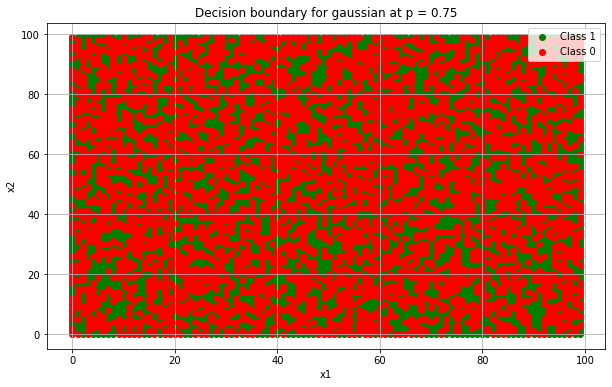

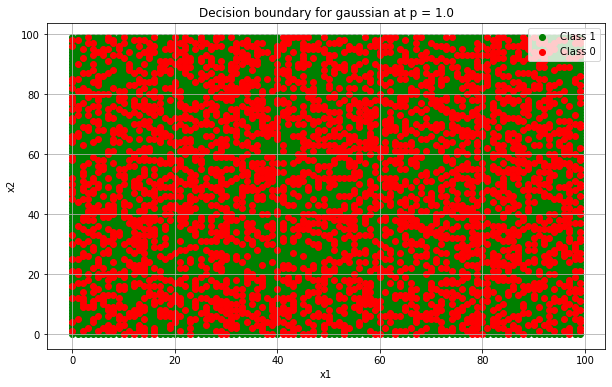

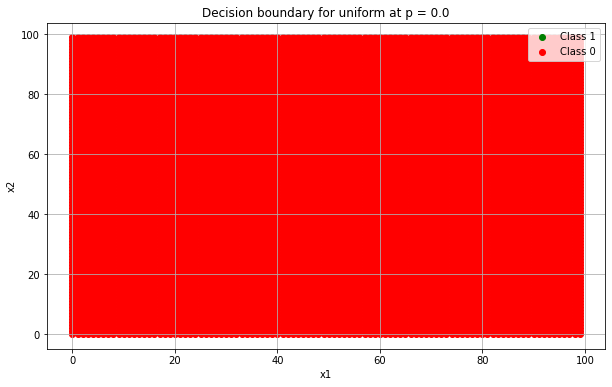

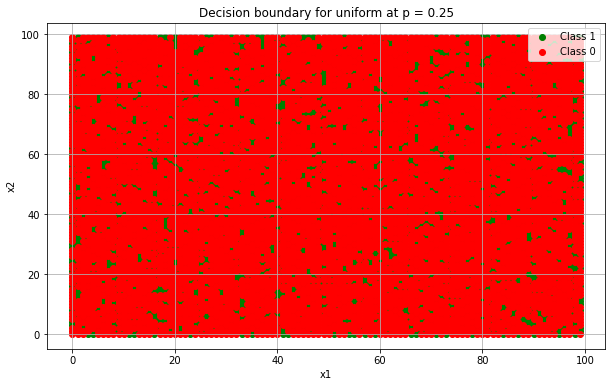

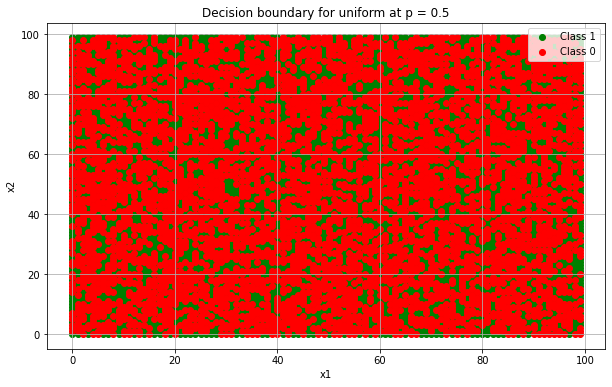

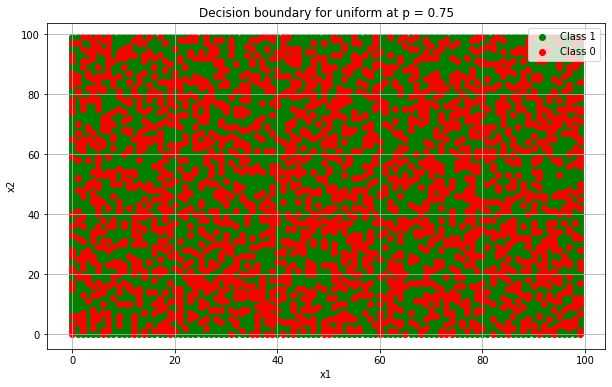

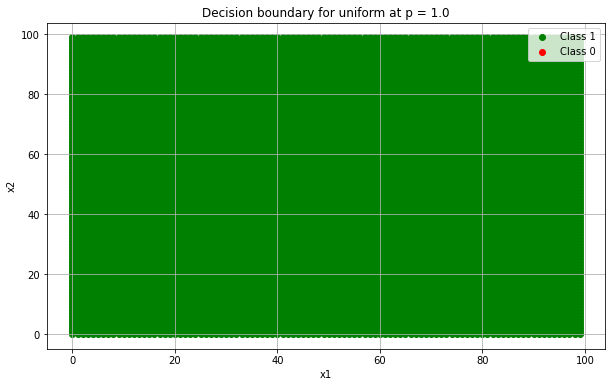

In [31]:
method_names = ['bernoulli','gaussian','uniform']
p_values = np.arange(0,1.1,0.25)

for method_name in method_names:
    for p in p_values:
        generate_graph(p,grid_df,method_name)